# Overfitting vs. Underfitting

## Detecting Overfitting Example

Increasing complexity of model can be a cause of overfitting

In [1]:
from sklearn.datasets import make_classification # to generate classification data
from sklearn.model_selection import train_test_split # split train, test
from sklearn.metrics import accuracy_score # to measure accuracy
from sklearn.tree import DecisionTreeClassifier # a Decision Tree Algorithm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Build a classification dataset
X, y = make_classification(
    n_samples=9000, n_features=18, n_informative=4, n_redundant=12, random_state=2
)

X.shape

(9000, 18)

In [3]:
print(y)

[1 0 1 ... 1 0 0]


In [4]:
# Could create a dataframe
df = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))))

In [5]:
# split out dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

- We'll be using our decision tree classifier for our example
- DecisionTree: It's a popular supervised learning algo and can be used for both classification and regression problems
- Tries to find relationships based on data
- The drawback of using decision trees is the complexity of the sub trees and branches (depth). This is because we could run into overfitting

We want to experiment with deploying a decision with different depth values (complexities) and check if we end up running into overfiting:
  - Build a sequence of depth values (1 to 20)
  - Build a model for each depth value (iterate over the sequence value)
  - Evaluate how the model will perform based on different depth values (training and testing scores)
  - Append the values into empty lists to print out the results and visualize them

In [6]:
# define 2 empty lists to host our values
train_scores = list()
test_scores = list()

In [7]:
# build a sequence using range function
values = list(range(1, 21))

# list comprehension method 
# [x for x in range(1, 21)]

`max_depth` int, depfault=None The maximum depth of the tree. If None, then nodes are expanded until all the leave are pure or until all leaves contain less than min_samples_split samples.

In [16]:
train_scores = list()
test_scores = list()

for i in values:
  # define my model
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train, y_train)
  # run prediction for training
  y_hat_train = model.predict(X_train)
  train_accu = accuracy_score(y_train, y_hat_train) # actual vs predicted
  # run prediction for testing
  y_hat_test = model.predict(X_test)
  test_accu = accuracy_score(y_test, y_hat_test) # actual vs predicted

  # append the calculated values to our lists
  train_scores.append(train_accu)
  test_scores.append(test_accu)

  print(f'depth: {i} \t| train: {train_accu:.2f} \t| test: {test_accu:.2f}')


depth: 1 	| train: 0.67 	| test: 0.67
depth: 2 	| train: 0.71 	| test: 0.69
depth: 3 	| train: 0.79 	| test: 0.79
depth: 4 	| train: 0.83 	| test: 0.83
depth: 5 	| train: 0.86 	| test: 0.86
depth: 6 	| train: 0.90 	| test: 0.88
depth: 7 	| train: 0.91 	| test: 0.89
depth: 8 	| train: 0.93 	| test: 0.88
depth: 9 	| train: 0.95 	| test: 0.88
depth: 10 	| train: 0.96 	| test: 0.88
depth: 11 	| train: 0.97 	| test: 0.87
depth: 12 	| train: 0.98 	| test: 0.87
depth: 13 	| train: 0.98 	| test: 0.86
depth: 14 	| train: 0.99 	| test: 0.87
depth: 15 	| train: 0.99 	| test: 0.87
depth: 16 	| train: 1.00 	| test: 0.86
depth: 17 	| train: 1.00 	| test: 0.87
depth: 18 	| train: 1.00 	| test: 0.86
depth: 19 	| train: 1.00 	| test: 0.86
depth: 20 	| train: 1.00 	| test: 0.87


([<matplotlib.axis.XTick at 0x13c8bd390>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

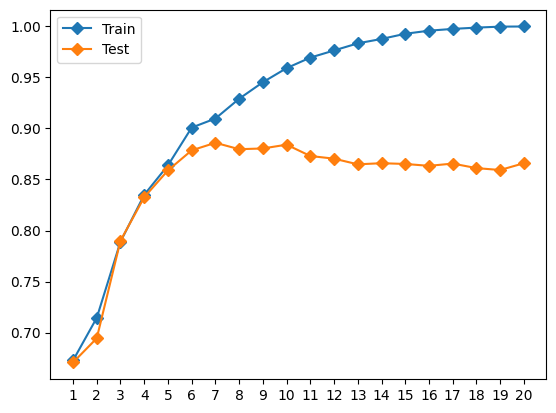

In [28]:
# plot the results
plt.plot(values, train_scores, marker="D", label="Train")
plt.plot(values, test_scores, marker="D", label="Test")
plt.legend()
plt.xticks(values)

- Looks like `max_depth` between 5 & 6 is the sweet spot for an appropriate fitting or good balance
- We are sacrificing very high accuracy in the training dataset to increase the chances of getting a consistent high score for the testing and new datasets

### Addressing Overfitting

- Reduce complexity of the model
- use regularization for models that have the functionality (i.e. neural networks, regression, logistic regression)

### GridSearchCV

- For the DecisionTree also above, we can test out different permutations for `max_depth`, `min_samples_split`, `min_samples_leaf` to achieve the optimal value of each to avoid overfitting and underfitting
- This process could be lengthy and require more code to do manually
- `GridSearchCV` can help automate testing out multiple configurations

In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

In [34]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [31]:
X = iris.data
y = iris.target

In [35]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# specify some hyperparameters
# DTC for the model name/type instead of simply model 
DTC = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=2)

In [41]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)

In [43]:
# Evaluation
accuracy = DTC.score(X_test, y_test)
print(accuracy)

0.9473684210526315


#### Hyperparameter Tuning and Cross Validation (CV) using `GridSearchCV`

- Every time we run the train_test_split we'll get a different accuracy score
- To get consistent scores, we'll need to take the average performance
- This process can be automated. It is called `Cross Validation`

![Cross Validation](<attachment:Screenshot 2024-01-11 at 9.35.39 PM.png>)
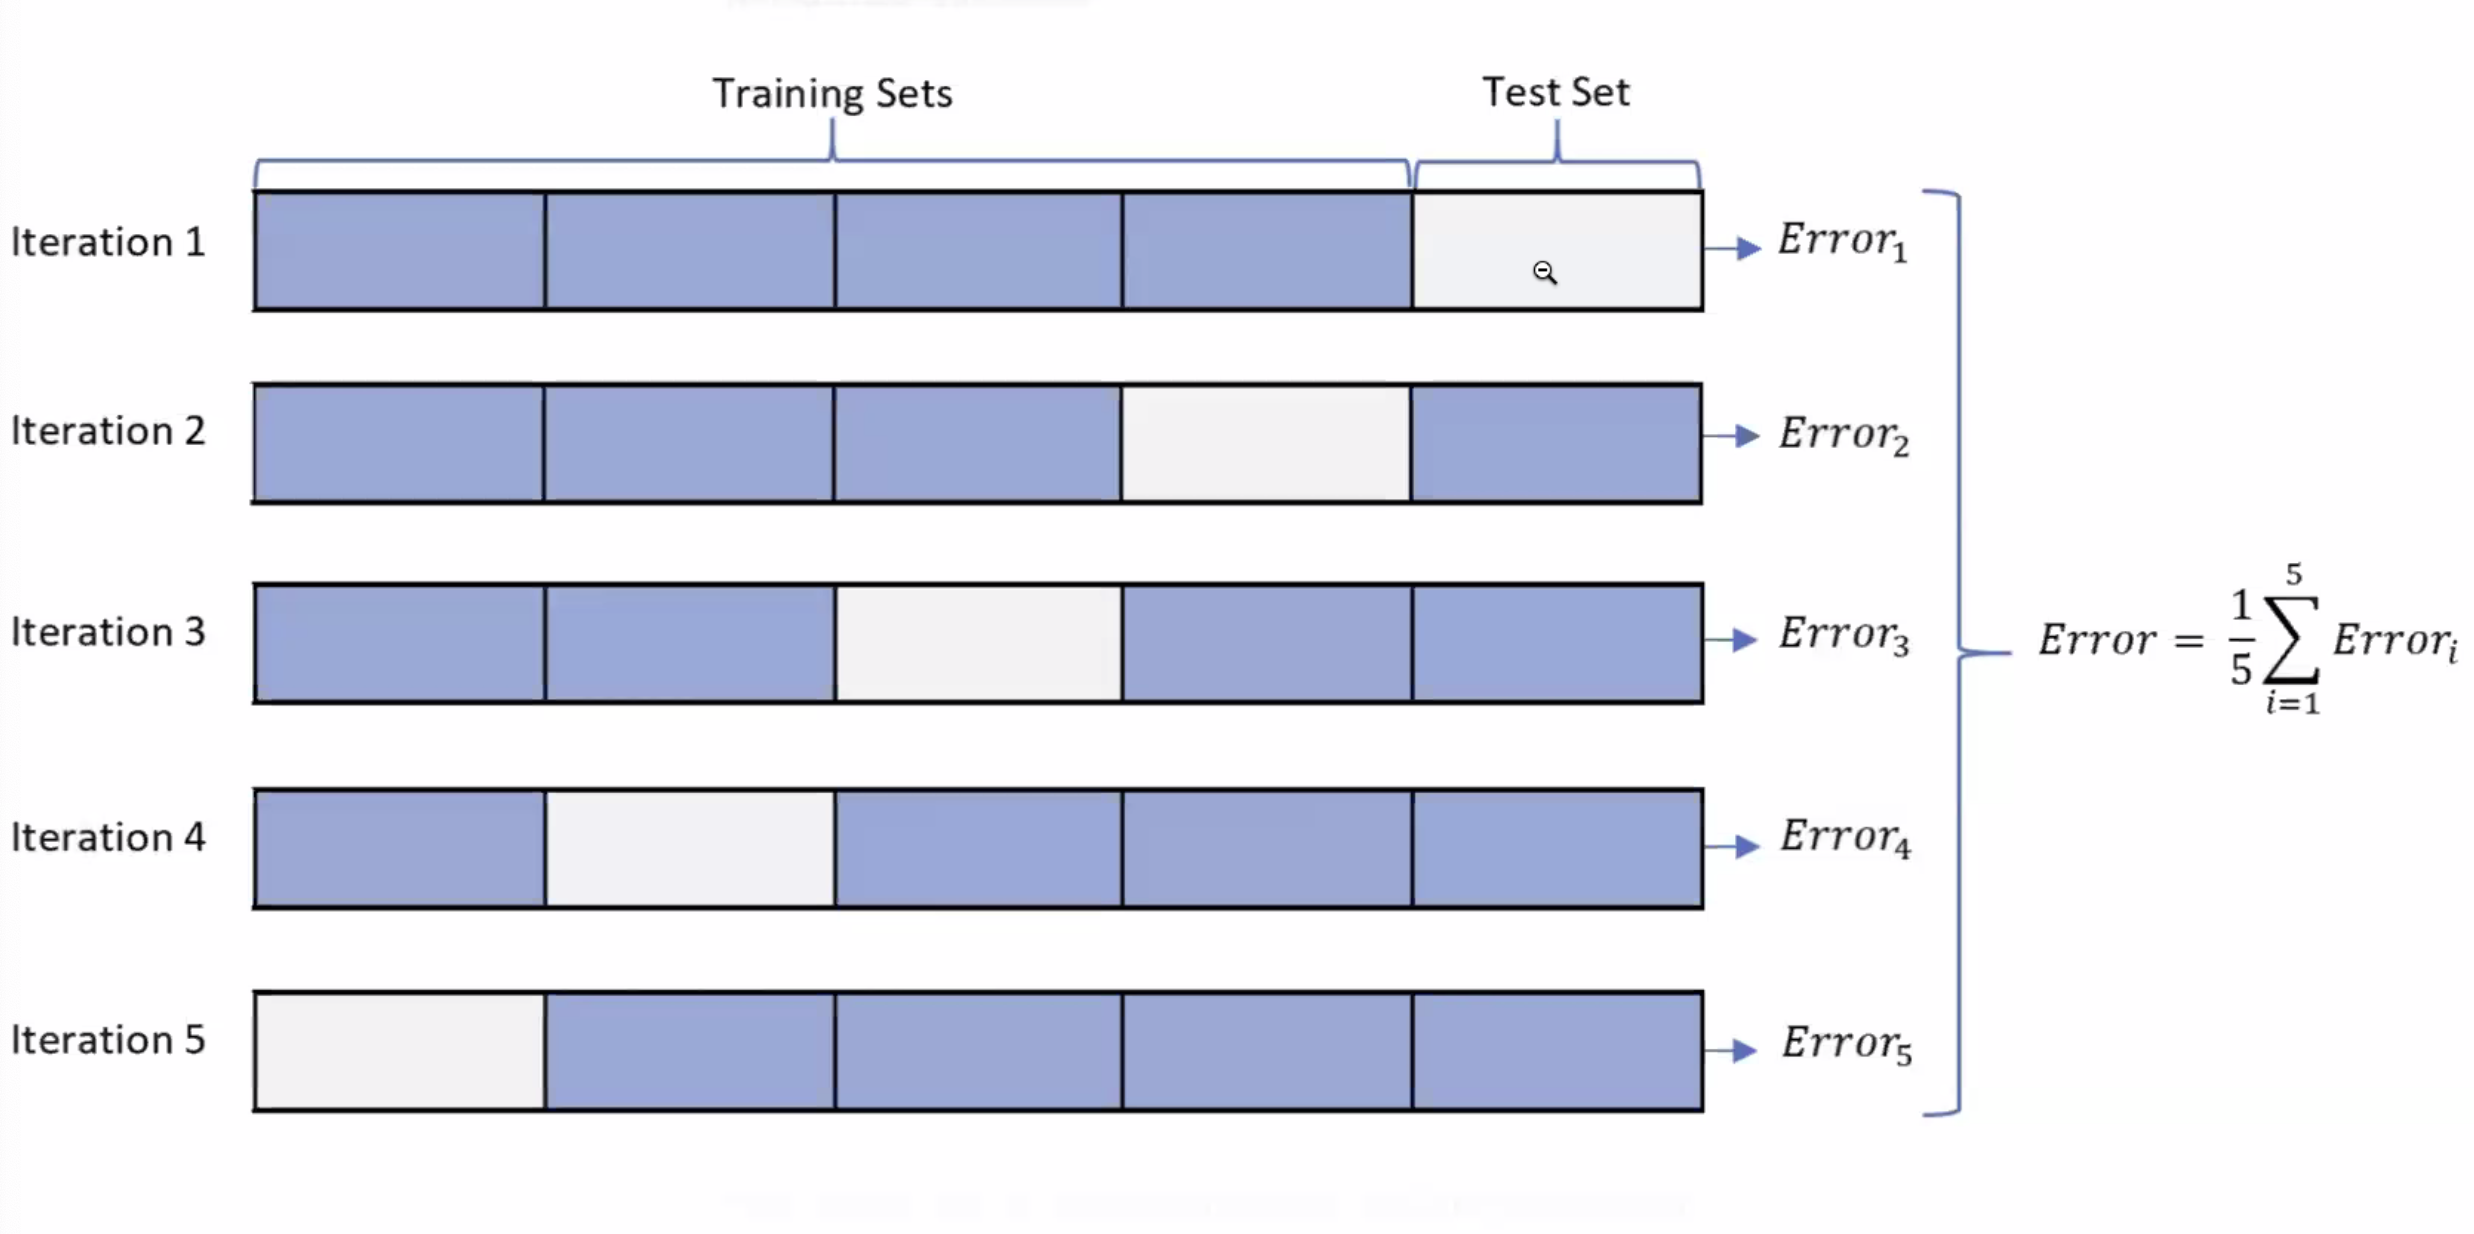

In [47]:
# Define a set of hyperparameters
param_dict = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [2, 3, 4, 6, 10],
    "min_samples_split": [5, 10, 20, 30],
}

In [48]:
# Apply GridSearchCV
DTC_G = GridSearchCV(
    DecisionTreeClassifier(),
    param_dict, # hyperparameters
    cv=3, # how many iterations to find an average
    scoring="accuracy" # specify the metric that will be used to determine the best combo of params
)

# Fit the model with GSCV
DTC_G.fit(X_train, y_train)

# will run: 3 (criterion) * 5 (max_depth) * 4 (min_samples_split) * 3 (cv)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 6, 10],
                         'min_samples_split': [5, 10, 20, 30]},
             scoring='accuracy')

In [56]:
# Retrieving the correct hyperparameters
DTC_G.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_split=5)

In [60]:
y_train_hat = DTC_G.best_estimator_.predict(X_train)
accuracy_score(y_train, y_train_hat)

0.9553571428571429

In [59]:
y_test_hat = DTC_G.best_estimator_.predict(X_test)
accuracy_score(y_test, y_test_hat)

0.9736842105263158